# The Hepatocellular Carcinoma - dataset analysis

In [260]:
%pip install seaborn
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Index

1. [Introduction](#Introduction)
2. [Data Exploration](#DataExploration)
3. [Outliars](#RemoveOutliars )
4. [Missing Values](#MissingValues )
5. [Feauture Scaling](#FeautureScaling)
6. [Model Training and Evaluation](#ModelTrainingandEvaluation)

## Introduction
[[ Back to the top ]](#Index)

In the realm of data science, real-world applications often present complex challenges that demand comprehensive solutions. One such challenge lies in the realm of healthcare, where the ability to harness data effectively can lead to significant advancements in patient care and treatment outcomes.

Our current endeavor embarks on a journey into the realm of oncology, specifically focusing on Hepatocellular Carcinoma (HCC), a primary liver cancer with significant global prevalence and mortality rates. Through the lens of data science, we aim to develop a robust machine learning model capable of predicting the survivability of patients diagnosed with HCC one year post-diagnosis.

## Data exploration
[[ Back to the top ]](#Index)

> Loading the HCC dataset
> Explore basic statistics of the dataset: number of features/records, class distribution, etc
> 

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from tabulate import tabulate
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [262]:
pd.set_option("display.max_columns" , None)

In [263]:
# Load the dataset
data = pd.read_csv("hcc_dataset.csv" , delimiter=',')

# Display the first few rows of the dataset
data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,NaN,NaN,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,NaN,NaN,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,NaN,NaN,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,NaN,NaN,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives


In [264]:
# Concatenate column names and data types into a single string
data_types_str = ", ".join([f"{column}: {dtype}" for column, dtype in data.dtypes.items()])

# Print the concatenated string
print(data_types_str)

Gender: object, Symptoms: object, Alcohol: object, HBsAg: object, HBeAg: object, HBcAb: object, HCVAb: object, Cirrhosis: object, Endemic: object, Smoking: object, Diabetes: object, Obesity: object, Hemochro: object, AHT: object, CRI: object, HIV: object, NASH: object, Varices: object, Spleno: object, PHT: object, PVT: object, Metastasis: object, Hallmark: object, Age: int64, Grams_day: object, Packs_year: object, PS: object, Encephalopathy: object, Ascites: object, INR: object, AFP: object, Hemoglobin: object, MCV: object, Leucocytes: object, Platelets: object,  Albumin: object, Total_Bil: object, ALT: object, AST: object, GGT: object, ALP: object, TP: object, Creatinine: object, Nodules: object, Major_Dim: object, Dir_Bil: object, Iron: object, Sat: object, Ferritin: object, Class: object


Some of these we know are numeric so we should change them for further analysis

In [265]:
# List of columns to convert to numeric
columns_to_convert = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine' , 'Nodules',	'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

# Convert selected columns to numeric
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [266]:
#Eliminate the space in the Albumin collumn
data.rename(columns={' Albumin': 'Albumin'}, inplace=True)

In [267]:
# Number of features and records
num_features = data.shape[1]
num_records = data.shape[0]
print("Number of features:", num_features)
print("Number of records:", num_records)

Number of features: 50
Number of records: 165


In [268]:
# Class distribution
class_distribution = data['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
Lives    102
Dies      63
Name: count, dtype: int64


In [269]:
# Values per attribute
pd.DataFrame(data.nunique()).T

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,2,3,2,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,51,19,30,5,3,3,87,132,71,128,105,131,41,62,93,107,139,124,46,84,6,68,41,68,57,84,2


## Outliars
[[ Back to the top ]](#Index)

In [270]:
# For Outliers we are looking at numerical values only
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate summary statistics for each numerical column
summary_stats = data[numerical_columns].describe().transpose()

In [271]:
# Calculate the interquartile range (IQR) for each numerical column
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Calculate the coefficient of variation (CV) for each numerical column
summary_stats['CV'] = summary_stats['std'] / summary_stats['mean']

# Sort columns by IQR and CV in descending order
summary_stats_sorted = summary_stats.sort_values(by=['IQR', 'CV'], ascending=False)

# Select top n columns with the highest coefficient of variation (CV)
n_top_columns = 5
top_columns = summary_stats_sorted.head(n_top_columns).index.tolist()
summary_stats_sorted

,count,mean,std,min,25%,50%,75%,max,IQR,CV
Platelets,162.0,113206.442654,107118.632481,1.71,255.750,93000.00,171500.000,459000.00,171244.250,0.946224
Ferritin,85.0,438.997647,457.114454,0.00,84.000,295.00,706.000,2230.00,622.000,1.041269
AFP,157.0,19299.951146,149098.335581,1.20,5.200,33.00,615.000,1810346.00,609.800,7.725322
GGT,162.0,268.026543,258.750319,23.00,91.250,179.50,345.250,1575.00,254.000,0.965391
ALP,162.0,212.211605,167.943548,1.28,108.250,162.00,261.500,980.00,153.250,0.791397
Grams_day,117.0,71.008547,76.277680,0.00,0.000,75.00,100.000,500.00,100.000,1.074204
Iron,86.0,85.598837,55.698995,0.00,40.500,83.00,118.000,224.00,77.500,0.650698
AST,162.0,96.382716,87.484241,17.00,46.250,71.00,110.250,553.00,64.000,0.907676
ALT,161.0,67.093168,57.539747,11.00,31.000,50.00,78.000,420.00,47.000,0.857610
Sat,85.0,37.028941,28.993552,0.00,16.000,27.00,56.000,126.00,40.000,0.782997


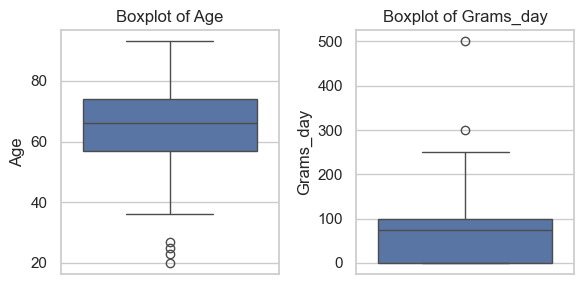

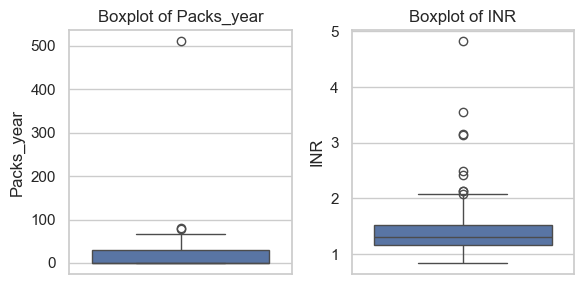

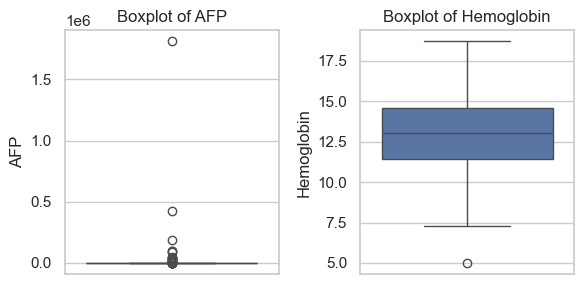

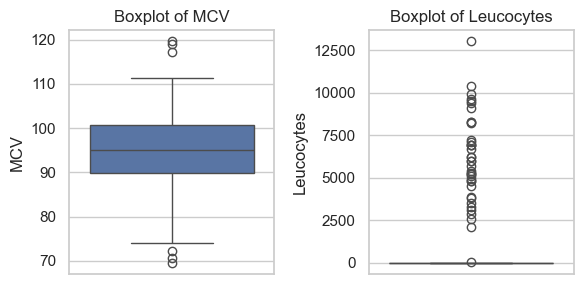

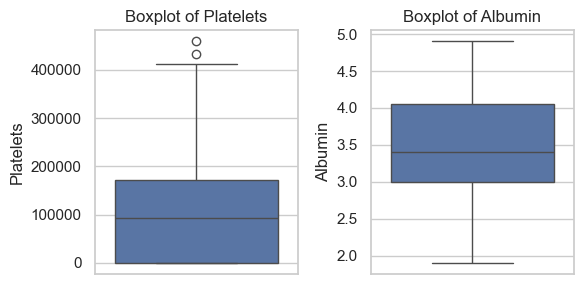

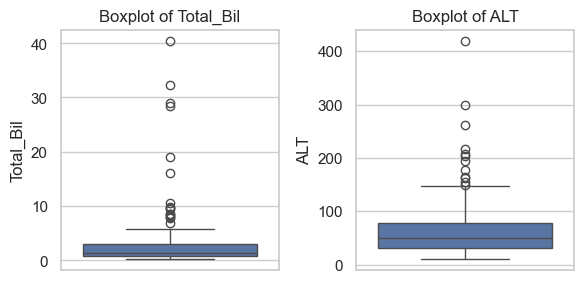

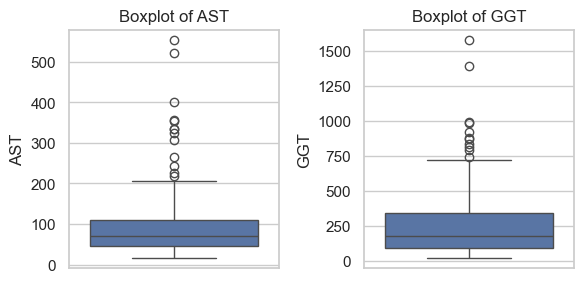

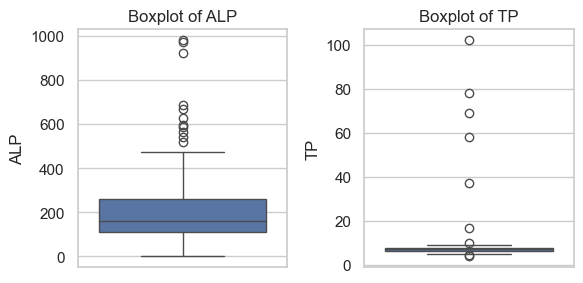

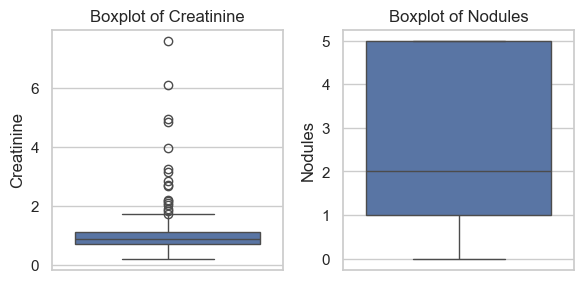

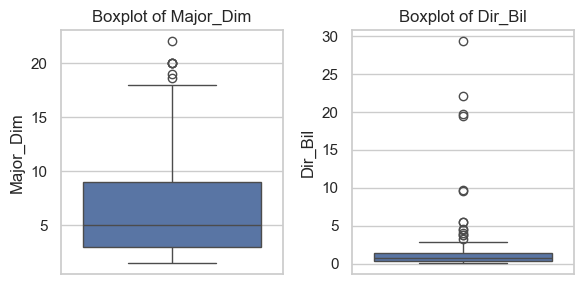

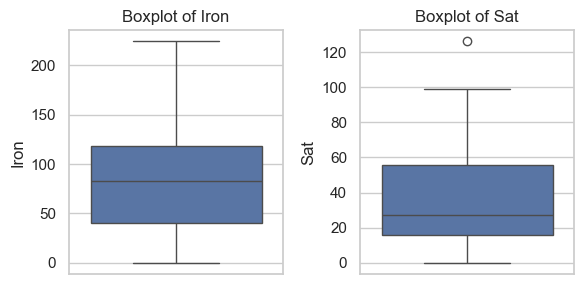

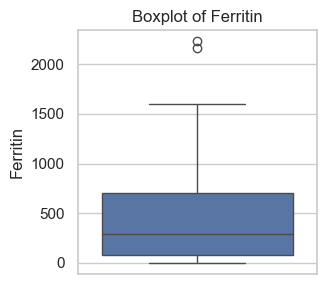

In [272]:
def visualize_outliers_in_pairs(df):
    """
    Visualize outliers in numerical columns of a DataFrame using boxplots displayed in pairs.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        None
    """
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate the number of pairs needed
    num_pairs = len(numerical_columns) // 2 + len(numerical_columns) % 2

    # Create boxplots for each pair of numerical columns
    for i in range(num_pairs):
        plt.figure(figsize=(6, 3))
        for j in range(2):
            idx = i * 2 + j
            if idx < len(numerical_columns):
                plt.subplot(1, 2, j + 1)
                sns.boxplot(data=df[numerical_columns[idx]])
                plt.title(f'Boxplot of {numerical_columns[idx]}')
        plt.tight_layout()
        plt.show()

# Visualize outliers in pairs for all numerical columns in the DataFrame
visualize_outliers_in_pairs(data)


In [273]:
def flag_outliers(df, column):
    """
    Flag outliers in a numerical column of a DataFrame based on the interquartile range (IQR) method.

    Parameters:
        df (DataFrame): Input DataFrame.
        column (str): Name of the numerical column.

    Returns:
        Series: Series containing outlier flags for the specified column.
    """
    # Calculate the IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold as a multiple of the IQR
    threshold = 1.5 * IQR

    # Flag outliers as 1, non-outliers as 0
    return np.where((df[column] < Q1 - threshold) | (df[column] > Q3 + threshold), 1, 0)

def flag_outliers_for_all_columns(df):
    """
    Flag outliers in all numerical columns of a DataFrame based on the interquartile range (IQR) method.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        DataFrame: DataFrame with new columns indicating outliers for all numerical columns.
    """
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Create a new DataFrame to store flagged data
    flagged_data = pd.DataFrame()

    # Iterate over numerical columns and flag outliers
    for col in numerical_columns:
        flagged_data[col + '_outlier_flag'] = flag_outliers(df, col)

    return flagged_data

# Flag outliers for all numerical columns in the DataFrame
data_flagged = flag_outliers_for_all_columns(data)

In [274]:
print(data_flagged)

     Age_outlier_flag  Grams_day_outlier_flag  Packs_year_outlier_flag  \
0                   0                       0                        0   
1                   0                       0                        0   
2                   0                       0                        0   
3                   0                       0                        0   
4                   0                       0                        0   
..                ...                     ...                      ...   
160                 0                       0                        0   
161                 0                       0                        0   
162                 0                       0                        0   
163                 0                       0                        0   
164                 0                       0                        0   

     INR_outlier_flag  AFP_outlier_flag  Hemoglobin_outlier_flag  \
0                   0                 0    

## Missing Values
[[ Back to the top ]](#Index)

In [275]:
# From the first rows we see the value '?' is being used as a null, we need to replace 'null' and '?' with actual NaN values
data.replace(['null', '?'], np.nan, inplace=True)

pd.set_option("display.max_columns" , None)
pd.DataFrame(data.isnull().sum(), columns=['Missing values']).T

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
Missing values,0,18,0,17,39,24,9,0,39,41,3,10,23,3,2,14,22,52,15,11,3,4,2,0,48,53,0,143,111,4,8,3,3,3,3,6,5,4,3,3,3,11,7,2,20,44,79,80,80,0


In [276]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().mean() * 100).round(2)

# Filter columns with more than 50% missing values
columns_with_high_missing = missing_percentage[missing_percentage > 50]

# Filter columns with more than 30% missing values
columns_with_medium_missing = missing_percentage[missing_percentage > 30]

# Print columns with more than 50% missing values
print("Columns with more than 50% missing values:")
print(columns_with_high_missing)

# Print columns with more than 30% missing values
print("\nColumns with more than 30% missing values:")
print(columns_with_medium_missing)

Columns with more than 50% missing values:
Encephalopathy    86.67
Ascites           67.27
dtype: float64

Columns with more than 30% missing values:
Varices           31.52
Packs_year        32.12
Encephalopathy    86.67
Ascites           67.27
Iron              47.88
Sat               48.48
Ferritin          48.48
dtype: float64


The strategie to handle missing values is:
- For categorical values use the most frequent one;
- For continous values use the mean, median, knn, most_frequent and random.

In [277]:
# Determine numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [278]:
# Replace 'Yes' and 'No' with 1 and 0 respectively
# Replace 'Lives' and 'Dies' with 1 and 0 respectively
data = data.replace({'Yes': 1, 'No': 0}).replace({'Lives': 1, 'Dies': 0})

# Call result.infer_objects(copy=False) to retain old behavior
data = data.infer_objects(copy=False)

# Separate categorical and numerical data
categorical_data_test = data.select_dtypes(include=['object']).copy()
numerical_data_test = data.select_dtypes(include=['float64', 'int64']).copy()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_21328\582230847.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Yes': 1, 'No': 0}).replace({'Lives': 1, 'Dies': 0})


In [279]:
df = pd.DataFrame(data)
X = numerical_data_test.drop('Class', axis=1)
y = df['Class']

In [280]:
class RandomImputer:
    def fit(self, X, y=None):
        self.fill_values = {col: X[col].dropna().sample(1).values[0] for col in X.columns}
        return self

    def transform(self, X):
        return X.fillna(self.fill_values)

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

Imputation method: mean
Mean CV score (MSE): 0.2198
Std CV score: 0.0432

Imputation method: median
Mean CV score (MSE): 0.2426
Std CV score: 0.0733

Imputation method: knn
Mean CV score (MSE): 0.2280
Std CV score: 0.0535

Imputation method: most_frequent
Mean CV score (MSE): 0.2341
Std CV score: 0.0707



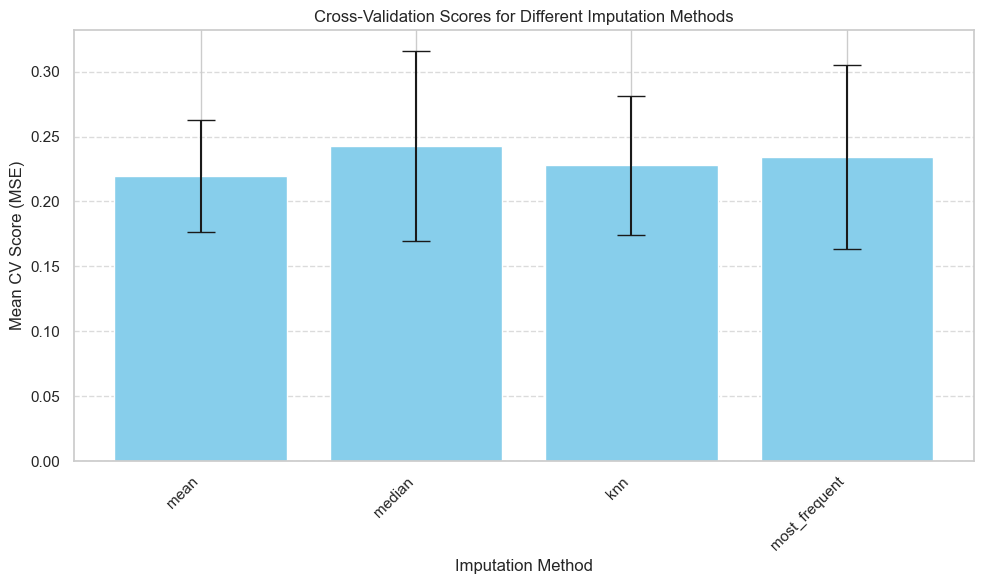

In [281]:
# Define imputation methods for the numeric variables and for now categorical variables will have the most frequent value
imputation_methods = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=3),
    'most_frequent': SimpleImputer(strategy='most_frequent')
}

# Initialize a dictionary to store cross-validation scores
cv_scores = {}

# Evaluate each imputation method
for method_name, imputer in imputation_methods.items():
    pipeline = Pipeline(steps=[
        ('imputer', imputer),
        ('regressor', LinearRegression())
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate mean and standard deviation of the scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Store the results
    cv_scores[method_name] = (mean_score, std_score)

# Print the cross-validation results
for method, scores in cv_scores.items():
    print(f"Imputation method: {method}")
    print(f"Mean CV score (MSE): {-scores[0]:.4f}")
    print(f"Std CV score: {scores[1]:.4f}\n")

# Store results in a list of lists
results_table = []
for method, scores in cv_scores.items():
    results_table.append([method, -scores[0], scores[1]])

# Store results in a list of lists
results_table = []
for method, scores in cv_scores.items():
    results_table.append([method, -scores[0], scores[1]])

# Extract method names and scores
methods = list(cv_scores.keys())
mean_scores = [-score[0] for score in cv_scores.values()]
std_scores = [score[1] for score in cv_scores.values()]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(methods, mean_scores, yerr=std_scores, capsize=10, color='skyblue')
plt.xlabel('Imputation Method')
plt.ylabel('Mean CV Score (MSE)')
plt.title('Cross-Validation Scores for Different Imputation Methods')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To determine the best imputation method for missing values based on the provided cross-validation scores, you should consider both the mean cross-validation score (mean squared error, MSE in this case) and the standard deviation of the scores.

Criteria for Evaluation:

*   Mean CV Score (MSE): Lower values are better, indicating a better fit to the data.
*   Standard Deviation (Std CV Score): Lower values are better, indicating more consistent performance across the folds.



Based on the provided results, Mean Imputation is the best method for handling missing values in this dataset. It has the lowest mean CV score (MSE) and a low standard deviation, indicating both a good fit and consistent performance across the cross-validation folds.

In [282]:
numeric_no_target = X.columns
# For categoricals we will use SimpleImputer object with the strategy set to 'most_frequent'
most_frequent = SimpleImputer(strategy='most_frequent')
mean =  SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform the data
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# For numericals we impute mean (as it was the best result)
data[numeric_no_target] = mean.fit_transform(data[numeric_no_target])

In [283]:
null_counts = data.isnull().sum()

if null_counts.sum() > 0:
    print("There are still nulls in the following columns:")
    print(null_counts[null_counts > 0])
else:
    print("There are no longer any nulls in the data set.")

There are no longer any nulls in the data set.


Changing columns for one's with unique values

In [284]:
# Function to get unique values for each columnn that isnt binary (Yes or No)
def get_unique_values(df):
    unique_values = {}
    for col in df.columns:
        # Get the unique values of the column
        values = df[col].unique()
        # Check if the column contains values other than 'yes' or 'no'
        if 'Yes' not in values and 'No' not in values:
            unique_values[col] = values
    return unique_values

# Get unique values
unique_values = get_unique_values(categorical_data_test)

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'PS': ['Active' 'Ambulatory' 'Restricted' 'Selfcare' 'Disabled']
Unique values in column 'Encephalopathy': [nan 'Grade I/II' 'Grade III/IV']
Unique values in column 'Ascites': [nan 'Mild' 'Moderate/Severe']


In [285]:
data = pd.get_dummies(data, columns=['Gender', 'PS', 'Encephalopathy', 'Ascites'], dummy_na=True)

In [286]:
# Convert boolean columns to integers (1 for True, 0 for False)
data = data.astype(int)

In [287]:
data.head()

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,Gender_Female,Gender_Male,Gender_nan,PS_Active,PS_Ambulatory,PS_Disabled,PS_Restricted,PS_Selfcare,PS_nan,Encephalopathy_Grade I/II,Encephalopathy_Grade III/IV,Encephalopathy_nan,Ascites_Mild,Ascites_Moderate/Severe,Ascites_nan
0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137,15,1,95,13,106,4,99,3,2,34,41,183,150,7,0,1,3,0,85,37,438,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,20,1,19299,12,95,1473,113206,3,3,67,96,268,212,8,1,1,1,1,85,37,438,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50,0,5,8,79,8,472,3,0,58,68,202,109,7,2,5,13,0,28,6,16,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30,0,2440,13,97,9,279,3,0,16,64,94,174,8,1,2,15,0,85,37,438,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
4,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30,0,49,14,95,6,199,4,0,147,306,173,109,6,1,1,9,1,59,15,22,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0


## Feauture Scaling
[[ Back to the top ]](#Index)

In [288]:
model_data=data.drop(columns='Class')
model_target=data.loc[:,'Class']

In [289]:
X_train, X_dev, y_train, y_dev = train_test_split(model_data, model_target, test_size=0.15, random_state=42, shuffle=True,stratify=model_target)

c:\Users\Utilizador\Desktop\DS\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


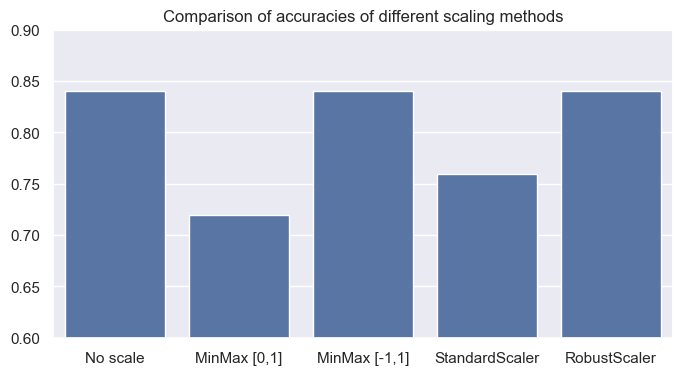

In [290]:
# Perform model fitting and evaluation for each scaling method
model_noscale = LogisticRegression(max_iter=10000, random_state=42).fit(X_train, np.array(y_train).ravel())
acc_noscale = model_noscale.score(X_dev, y_dev)

min_max1 = MinMaxScaler().fit(X_train)
min_max1_X_train = min_max1.transform(X_train)
min_max1_X_dev = min_max1.transform(X_dev)
model_min_max1 = LogisticRegression(max_iter=10000, random_state=42).fit(min_max1_X_train, np.array(y_train).ravel())
acc_mm1 = model_min_max1.score(min_max1_X_dev, np.array(y_dev).ravel())

min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
min_max2_X_train = min_max2.transform(X_train)
min_max2_X_dev = min_max2.transform(X_dev)
model_min_max2 = LogisticRegression(max_iter=10000, random_state=42).fit(min_max2_X_train, np.array(y_train).ravel())
acc_mm2 = model_min_max2.score(min_max2_X_dev, np.array(y_dev).ravel())

scaler = StandardScaler().fit(X_train)
scaler_X_train = scaler.transform(X_train)
scaler_X_dev = scaler.transform(X_dev)
model_standard = LogisticRegression(max_iter=10000, random_state=42).fit(scaler_X_train, np.array(y_train).ravel())
acc_standard = model_standard.score(scaler_X_dev, np.array(y_dev).ravel())

robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_dev = robust.transform(X_dev)
model_robust = LogisticRegression(max_iter=10000, random_state=42).fit(robust_X_train, np.array(y_train).ravel())
acc_robust = model_robust.score(robust_X_dev, np.array(y_dev).ravel())

# Plotting the results to compare
sns.set()
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=['No scale','MinMax [0,1]', 'MinMax [-1,1]', 'StandardScaler', 'RobustScaler'],
                 y=[acc_noscale, acc_mm1, acc_mm2, acc_standard, acc_robust])
ax.set_ylim([0.6, 0.9])
ax.set_title('Comparison of accuracies of different scaling methods')
plt.show()

Given that the RobustScaler have a higher score while the others score lower, we interpret the results as follows:


*   Our data likely has a range and distribution that benefits from centering around zero and adjusting for outliers.
*   RobustScaler scales the data using statistics that are robust to outliers, making it particularly useful if our data contains outliers.

We will continue with RobustScaler has it's a good default choice due to its balance of robustness and simplicity.

In [291]:
scaler = RobustScaler().fit(model_data)
model_data = pd.DataFrame(scaler.transform(model_data), columns=model_data.columns, index=model_data.index)

## Model Training and Testing
[[ Back to the top]](#Index)

Function for the confusion matrix

In [292]:
def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)

Function to evaluate models

In [293]:
# Define the function to evaluate model performance
def evaluate_model_performance(model, X_train, X_dev, y_train, y_dev):
    performance_metrics = {}

    # Train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Prediction on training set
    y_pred_train = model.predict(X_train)

    # Prediction on test set
    y_pred_test = model.predict(X_dev)

    # Calculate performance metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_dev, y_pred_test)
    test_precision = precision_score(y_dev, y_pred_test, average='weighted')
    test_recall = recall_score(y_dev, y_pred_test, average='weighted')
    test_f1_score = f1_score(y_dev, y_pred_test, average='weighted')

    # Save metrics in the dictionary
    performance_metrics['train_accuracy'] = train_accuracy
    performance_metrics['test_accuracy'] = test_accuracy
    performance_metrics['test_precision'] = test_precision
    performance_metrics['test_recall'] = test_recall
    performance_metrics['test_f1_score'] = test_f1_score

    return performance_metrics

<a id="section56">
<h4 style='color:#5F6A6E' > Logistic Regression</h4>

In [294]:
parameter_space_Log = {
    'penalty': ['l2'],
    'dual': [ False],  # Only implemented for l2 penalty with liblinear solver;
    'C': np.logspace(0, 4, 10),  # Regularization parameter
    'class_weight': ['balanced', None],  # For handling class imbalance
    'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [295]:
# Initializing the GridSearchCV
Log = LogisticRegression(random_state=42)
clf_Log = GridSearchCV(Log, parameter_space_Log, n_jobs=-1,  error_score='raise')
clf_Log.fit(model_data, np.array(model_target).ravel())

GridSearchCV(error_score='raise', estimator=LogisticRegression(random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'class_weight': ['balanced', None], 'dual': [False],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [296]:
# Best Parameters
print("Best Parameters found:")
print(clf_Log.best_params_)
print()

# Best Estimator
print("Best Estimator found:")
print(clf_Log.best_estimator_)
print()

# Best Score
print('Best Score:\n' , clf_Log.best_score_)

Best Parameters found:
{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}

Best Estimator found:
LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Best Score:
 0.7333333333333334


In [297]:
Log_model_data = clf_Log.best_estimator_

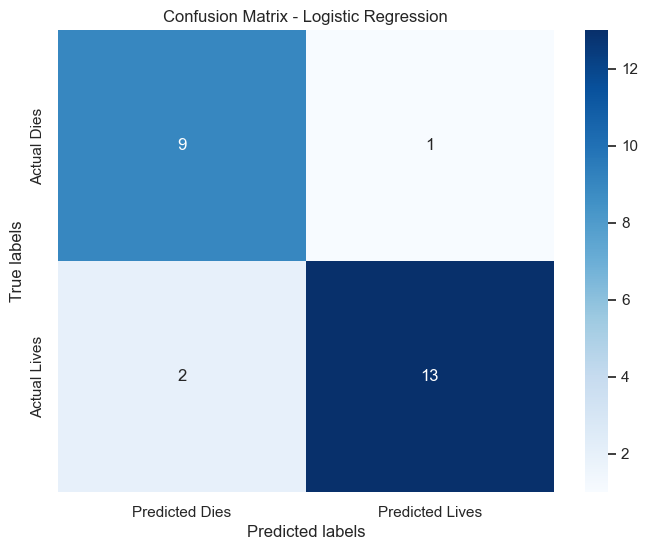

In [298]:
Log_model_data.fit(X_train, y_train)

# Make predictions on the test set
predicted_labels = Log_model_data.predict(X_dev)

# Compute confusion matrix
cm = confusion_matrix(y_dev, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Dies', 'Predicted Lives'], yticklabels=['Actual Dies', 'Actual Lives'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

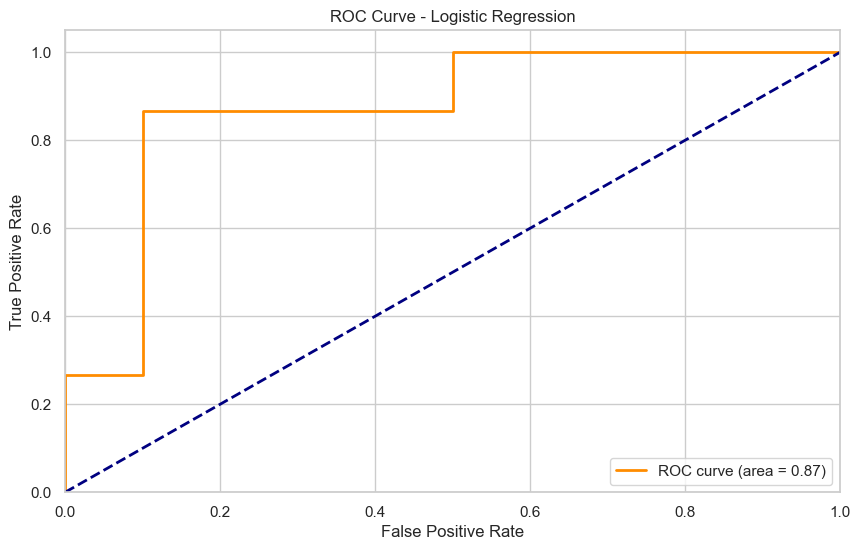

In [299]:
# Predicting probabilities on the test set
y_prob = Log_model_data.predict_proba(X_dev)[:, 1]

# Calculation of ROC curve values
fpr, tpr, thresholds = roc_curve(y_dev, y_prob)
roc_auc = auc(fpr, tpr)

# ROC curve plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

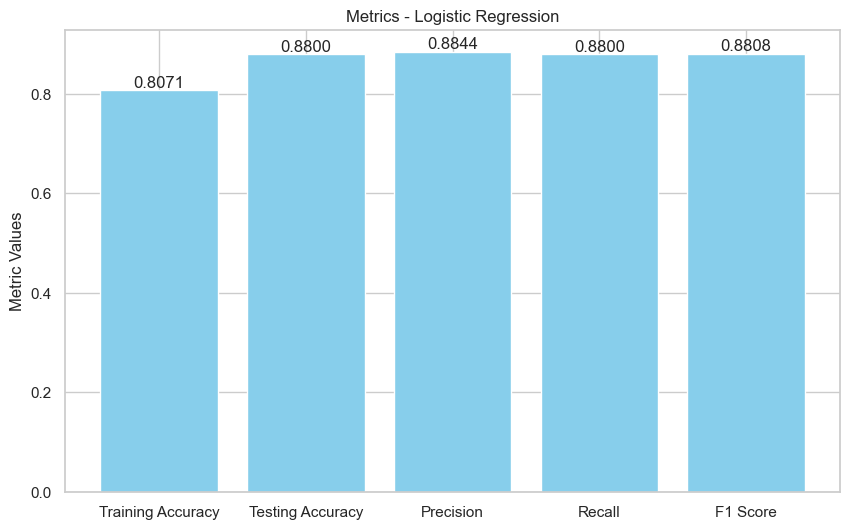

In [300]:
# Evaluate model performance
logistic_regression_performance = evaluate_model_performance(Log_model_data, X_train, X_dev, y_train, y_dev)

# Extract performance metrics
logistic_regression_metrics = {
    "Training Accuracy": logistic_regression_performance['train_accuracy'],
    "Testing Accuracy": logistic_regression_performance['test_accuracy'],
    "Precision": logistic_regression_performance['test_precision'],
    "Recall": logistic_regression_performance['test_recall'],
    "F1 Score": logistic_regression_performance['test_f1_score']
}

metrics_names = list(logistic_regression_metrics.keys())

metrics_values = list(logistic_regression_metrics.values())

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics_names, metrics_values, color='skyblue')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

ax.set_ylabel('Metric Values')
ax.set_title('Metrics - Logistic Regression')
plt.show()

<a id="section56">
<h4 style='color:#5F6A6E' > Random Forest</h4>

In [301]:
# Define the parameter grid
parameter_space_rf = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

In [302]:
# Initializing the GridSearchCV
rf = RandomForestClassifier(random_state=42)
clf_rf = GridSearchCV(rf, parameter_space_rf, n_jobs=-1,  error_score='raise')
clf_rf.fit(model_data, np.array(model_target).ravel())

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [303]:
# Best Parameters
print("Best Parameters found:")
print(clf_rf.best_params_)
print()

# Best Estimator
print("Best Estimator found:")
print(clf_rf.best_estimator_)
print()

# Best Score
print('Best Score:\n' , clf_rf.best_score_)

Best Parameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Estimator found:
RandomForestClassifier(n_estimators=50, random_state=42)

Best Score:
 0.7696969696969698


In [304]:
# Instantiate the RandomForestClassifier
random_forest_model = clf_rf.best_estimator_

# Evaluate the performance of the RandomForestClassifier
random_forest_performance = evaluate_model_performance(random_forest_model, X_train, X_dev, y_train, y_dev)

# Print the performance metrics
print(random_forest_performance)

{'train_accuracy': 1.0, 'test_accuracy': 0.76, 'test_precision': 0.76, 'test_recall': 0.76, 'test_f1_score': 0.76}


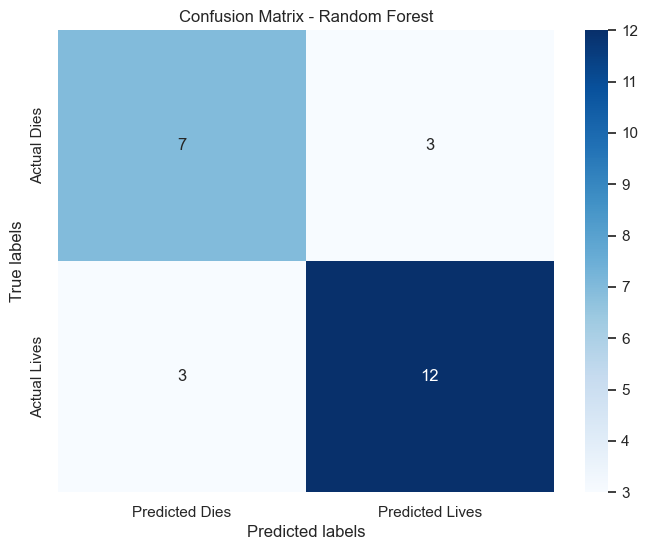

In [305]:
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
predicted_labels = random_forest_model.predict(X_dev)

# Compute confusion matrix
cm = confusion_matrix(y_dev, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Dies', 'Predicted Lives'], yticklabels=['Actual Dies', 'Actual Lives'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

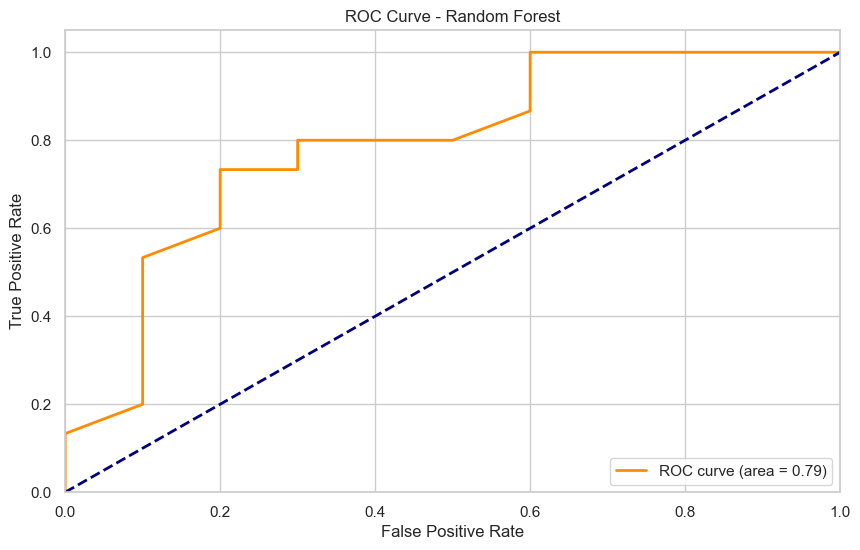

In [306]:
# Predicting probabilities on the test set
y_prob = random_forest_model.predict_proba(X_dev)[:, 1]

# Calculation of ROC values
fpr, tpr, thresholds = roc_curve(y_dev, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

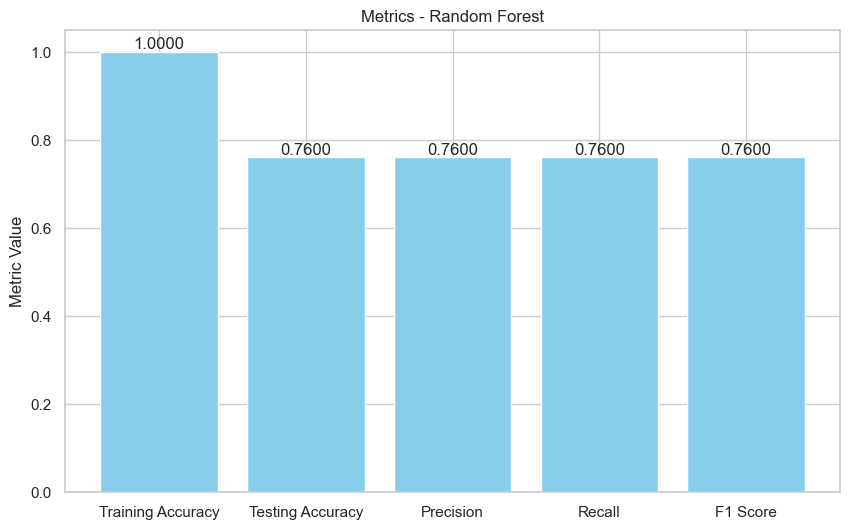

In [307]:
# Evaluate model performance
random_forest_performance = evaluate_model_performance(random_forest_model, X_train, X_dev, y_train, y_dev)

# Extract performance metrics
random_forest_metrics = {
    "Training Accuracy": random_forest_performance['train_accuracy'],
    "Testing Accuracy": random_forest_performance['test_accuracy'],
    "Precision": random_forest_performance['test_precision'],
    "Recall": random_forest_performance['test_recall'],
    "F1 Score": random_forest_performance['test_f1_score']
}

metrics_names = list(random_forest_metrics.keys())

metrics_values = list(random_forest_metrics.values())

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics_names, metrics_values, color='skyblue')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

ax.set_ylabel('Metric Value')
ax.set_title('Metrics - Random Forest')
plt.show()

<a id="section56">
<h4 style='color:#5F6A6E' > Decision Tree</h4>

In [308]:
parameter_space_dt = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],  
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42]
}

In [309]:
# Initializing the GridSearchCV with DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
clf_dt = GridSearchCV(dt, parameter_space_dt, n_jobs=-1, error_score='raise')
clf_dt.fit(model_data, np.array(model_target).ravel())

GridSearchCV(error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [42],
                         'splitter': ['best', 'random']})

In [310]:
# Best Parameters
print("Best Parameters found:")
print(clf_dt.best_params_)
print()

# Best Estimator
print("Best Estimator found:")
print(clf_dt.best_estimator_)
print()

# Best Score
print('Best Score:\n' , clf_dt.best_score_)

Best Parameters found:
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}

Best Estimator found:
DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

Best Score:
 0.7212121212121213


In [311]:
# Instantiate the DecisionTreeClassifier
Decision_tree_model = clf_dt.best_estimator_

# Evaluate the performance of the DecisionTreeClassifier
decision_tree_performance = evaluate_model_performance(Decision_tree_model, X_train, X_dev, y_train, y_dev)

# Print the performance metrics
print(decision_tree_performance)

{'train_accuracy': 0.9, 'test_accuracy': 0.76, 'test_precision': 0.7743589743589743, 'test_recall': 0.76, 'test_f1_score': 0.7623376623376623}


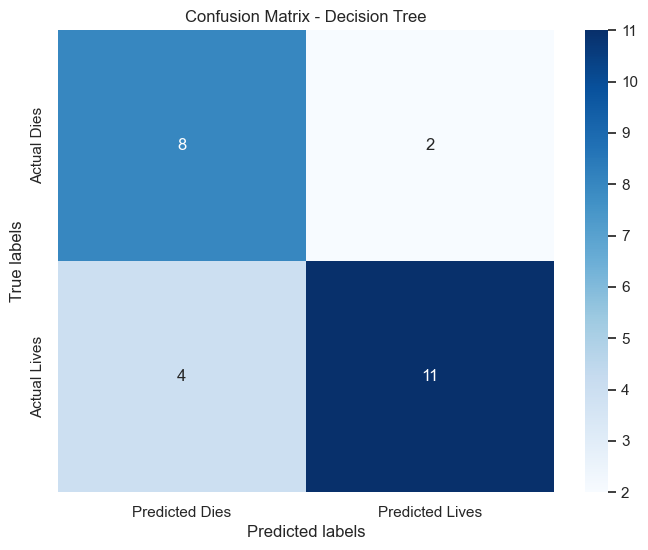

In [312]:
Decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
predicted_labels = Decision_tree_model.predict(X_dev)

# Compute confusion matrix
cm = confusion_matrix(y_dev, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Dies', 'Predicted Lives'], yticklabels=['Actual Dies', 'Actual Lives'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

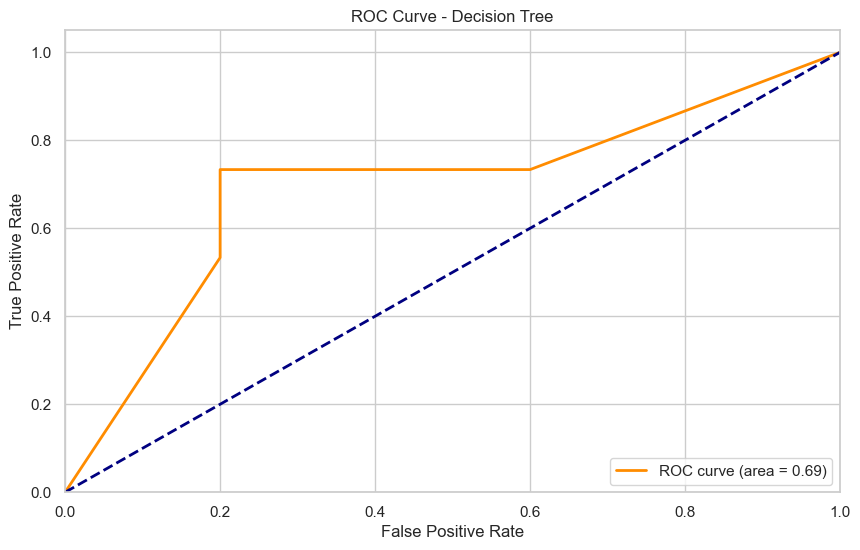

In [313]:
# Predicting probabilities on the test set
y_prob = Decision_tree_model.predict_proba(X_dev)[:, 1]

# Calculation of ROC curve values
fpr, tpr, thresholds = roc_curve(y_dev, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

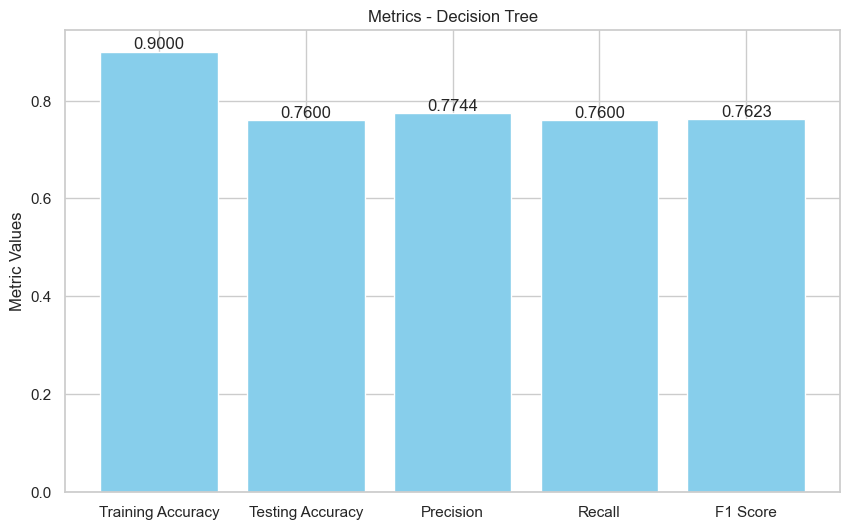

In [314]:
# Evaluate model performance
Decision_tree_performance = evaluate_model_performance(Decision_tree_model, X_train, X_dev, y_train, y_dev)

# Extract performance metrics
Decision_tree_metrics = {
    "Training Accuracy": Decision_tree_performance['train_accuracy'],
    "Testing Accuracy": Decision_tree_performance['test_accuracy'],
    "Precision": Decision_tree_performance['test_precision'],
    "Recall": Decision_tree_performance['test_recall'],
    "F1 Score": Decision_tree_performance['test_f1_score']
}

metrics_names = list(Decision_tree_metrics.keys())

metrics_values = list(Decision_tree_metrics.values())

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics_names, metrics_values, color='skyblue')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

ax.set_ylabel('Metric Values')
ax.set_title('Metrics - Decision Tree')
plt.show()

<a id="section56">
<h4 style='color:#5F6A6E' > KNN K-nearest neighbours</h4>

In [315]:
parameter_space_knn = {
    'n_neighbors': [5, 10, 15], 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 50, 100], 
    'p': [1, 2] 
}

In [316]:
# Initializing the GridSearchCV with KNeighborsClassifier
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, parameter_space_knn, n_jobs=-1, error_score='raise')
clf_knn.fit(model_data, np.array(model_target).ravel())

GridSearchCV(error_score='raise', estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 50, 100], 'n_neighbors': [5, 10, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [317]:
# Best Parameters
print("Best Parameters found:")
print(clf_knn.best_params_)
print()

# Best Estimator
print("Best Estimator found:")
print(clf_knn.best_estimator_)
print()

# Best Score
print('Best Score:\n' , clf_knn.best_score_)

Best Parameters found:
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

Best Estimator found:
KNeighborsClassifier(n_neighbors=10)

Best Score:
 0.6666666666666667


In [318]:
# Instantiate the KNeighborsClassifier
k_nearest_neighbor_model = clf_knn.best_estimator_

# Evaluate the performance of the KNeighborsClassifier
k_nearest_neighbor_performance = evaluate_model_performance(k_nearest_neighbor_model, X_train, X_dev, y_train, y_dev)

# Print the performance metrics
print(k_nearest_neighbor_performance)

{'train_accuracy': 0.6642857142857143, 'test_accuracy': 0.72, 'test_precision': 0.7190476190476192, 'test_recall': 0.72, 'test_f1_score': 0.7080213903743316}


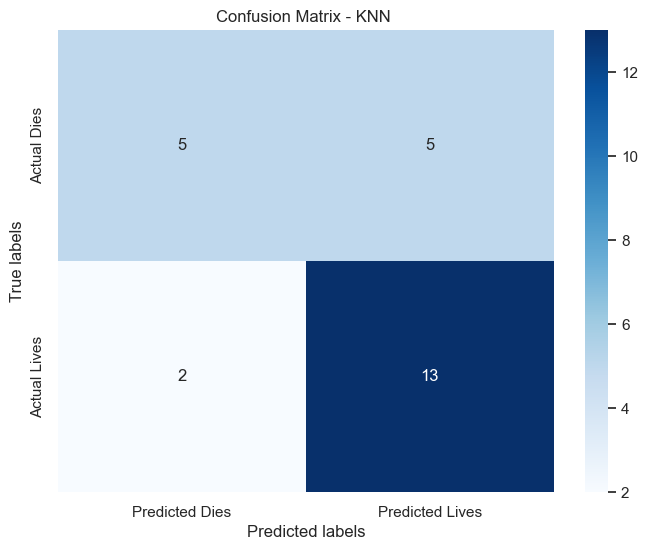

In [319]:
k_nearest_neighbor_model.fit(X_train, y_train)

# Make predictions on the test set
predicted_labels = k_nearest_neighbor_model.predict(X_dev)

# Compute confusion matrix
cm = confusion_matrix(y_dev, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Dies', 'Predicted Lives'], yticklabels=['Actual Dies', 'Actual Lives'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN ')
plt.show()

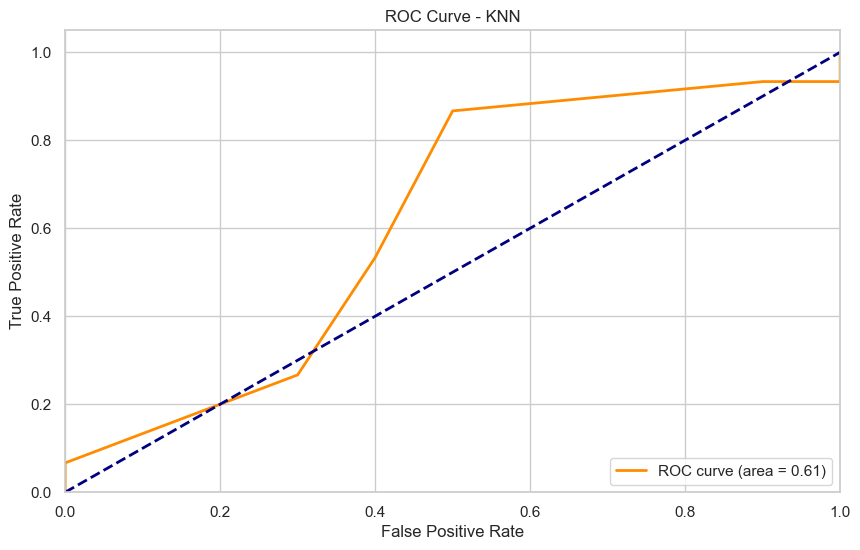

In [320]:
# Predicting probabilities on the test set
y_prob = k_nearest_neighbor_model.predict_proba(X_dev)[:, 1]

# Calculation of ROC curve values
fpr, tpr, thresholds = roc_curve(y_dev, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

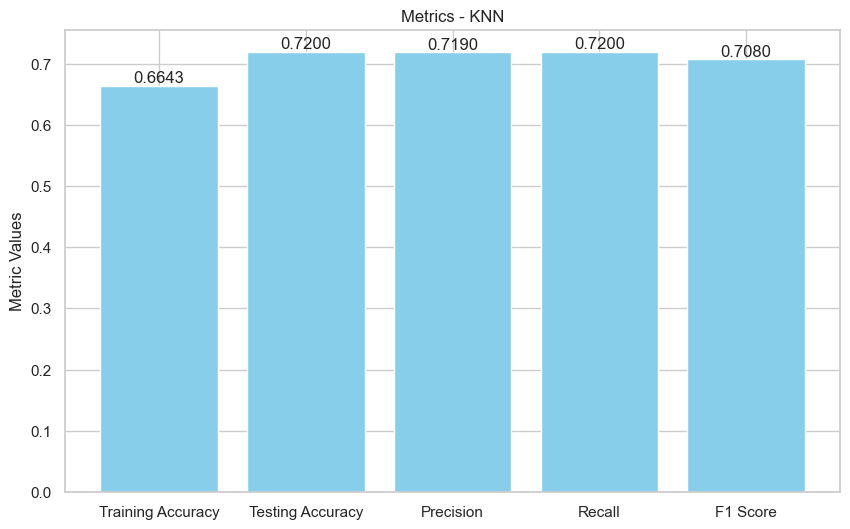

In [321]:
# Evaluate model performance
k_nearest_neighbor_performance = evaluate_model_performance(k_nearest_neighbor_model, X_train, X_dev, y_train, y_dev)

# Extract performance metrics
k_nearest_neighbor_metrics = {
    "Training Accuracy": k_nearest_neighbor_performance['train_accuracy'],
    "Testing Accuracy": k_nearest_neighbor_performance['test_accuracy'],
    "Precision": k_nearest_neighbor_performance['test_precision'],
    "Recall": k_nearest_neighbor_performance['test_recall'],
    "F1 Score": k_nearest_neighbor_performance['test_f1_score']
}

metrics_names = list(k_nearest_neighbor_metrics.keys())

metrics_values = list(k_nearest_neighbor_metrics.values())

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics_names, metrics_values, color='skyblue')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

ax.set_ylabel('Metric Values')
ax.set_title('Metrics - KNN')
plt.show()

<a id="section56">
<h4 style='color:#5F6A6E' > Naive Bayes</h4>

In [322]:
parameter_space_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  
}

In [323]:
# Initializing the GridSearchCV
Nb = GaussianNB()
clf_nb = GridSearchCV(Nb, parameter_space_nb, n_jobs=-1, error_score='raise')
clf_nb.fit(model_data, np.array(model_target).ravel())

GridSearchCV(error_score='raise', estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]})

In [324]:
# Best Parameters
print("Best Parameters found:")
print(clf_nb.best_params_)
print()

# Best Estimator
print("Best Estimator found:")
print(clf_nb.best_estimator_)
print()

# Best Score
print('Best Score:\n' , clf_nb.best_score_)

Best Parameters found:
{'var_smoothing': 1e-09}

Best Estimator found:
GaussianNB()

Best Score:
 0.6727272727272728


In [325]:
# Instantiate the GaussianNB
naive_bayes_model = clf_nb.best_estimator_

# Evaluate the performance of the GaussianNB
naive_bayes_performance = evaluate_model_performance(naive_bayes_model, X_train, X_dev, y_train, y_dev)

# Print the performance metrics
print(naive_bayes_performance)

{'train_accuracy': 0.7214285714285714, 'test_accuracy': 0.72, 'test_precision': 0.7190476190476192, 'test_recall': 0.72, 'test_f1_score': 0.7080213903743316}


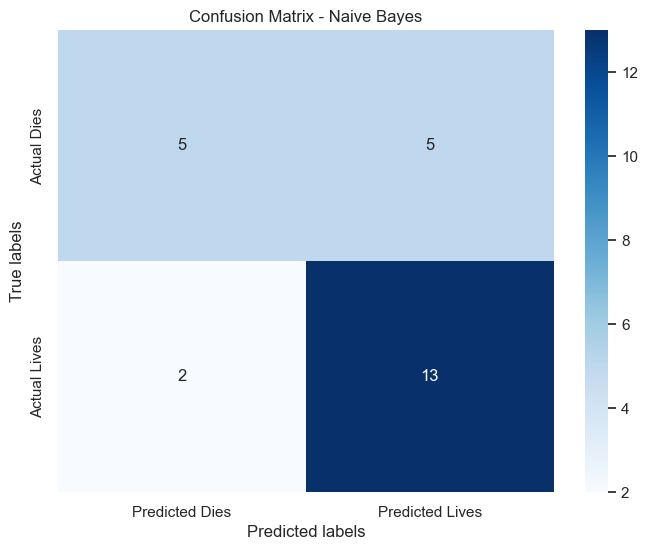

In [326]:
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
predicted_labels = naive_bayes_model.predict(X_dev)

# Compute confusion matrix
cm = confusion_matrix(y_dev, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Dies', 'Predicted Lives'], yticklabels=['Actual Dies', 'Actual Lives'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

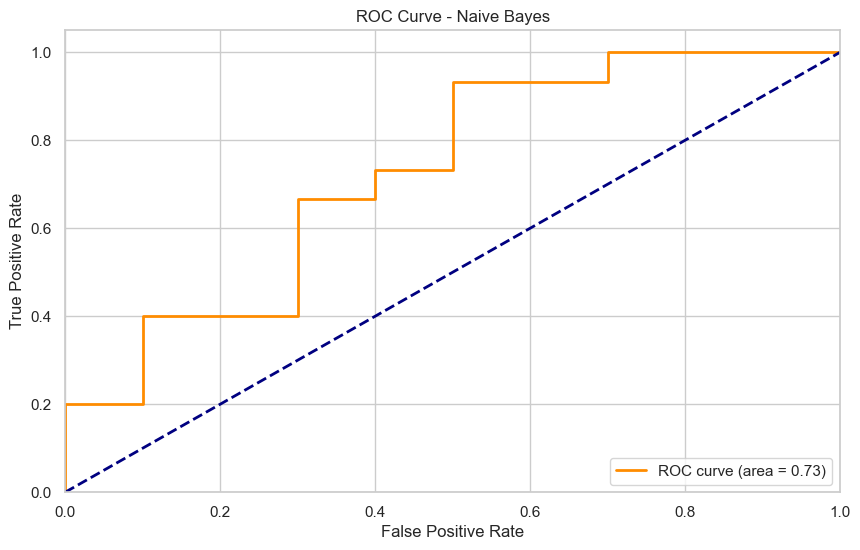

In [327]:
# Predicting probabilities on the test set
y_prob = naive_bayes_model.predict_proba(X_dev)[:, 1]

# Calculation of ROC curve values
fpr, tpr, thresholds = roc_curve(y_dev, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

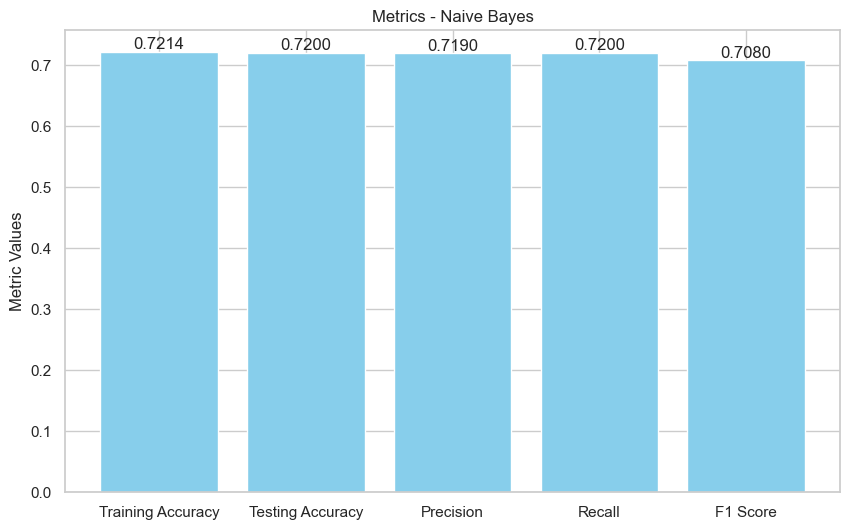

In [328]:
# Extract performance metrics
naive_bayes_metrics = {
    "Training Accuracy": naive_bayes_performance['train_accuracy'],
    "Testing Accuracy": naive_bayes_performance['test_accuracy'],
    "Precision": naive_bayes_performance['test_precision'],
    "Recall": naive_bayes_performance['test_recall'],
    "F1 Score": naive_bayes_performance['test_f1_score']
}

metrics_names = list(naive_bayes_metrics.keys())

metrics_values = list(naive_bayes_metrics.values())

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics_names, metrics_values, color='skyblue')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

ax.set_ylabel('Metric Values')
ax.set_title('Metrics - Naive Bayes')
plt.show()

Comparison off all models in Roc curves

Logistic Regression
Random Forest
Naive Bayes
K-Nearest Neighbors
Decision Tree


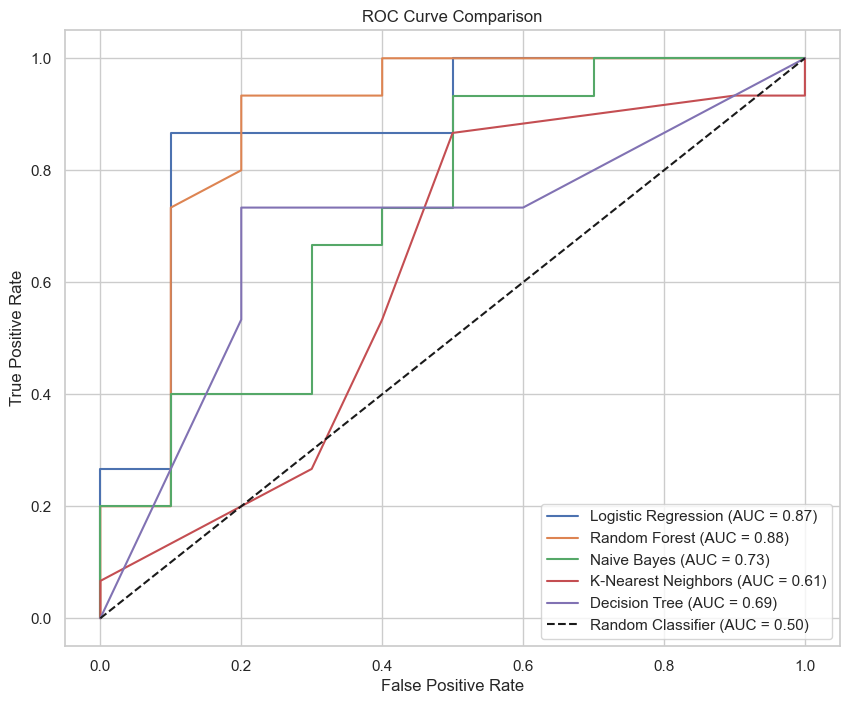

In [329]:
models = {
    "Logistic Regression": LogisticRegression(**clf_Log.best_params_),
    "Random Forest": RandomForestClassifier(**clf_rf.best_params_),
    "Naive Bayes": GaussianNB(**clf_nb.best_params_ ),
    "K-Nearest Neighbors": KNeighborsClassifier(**clf_knn.best_params_),
    "Decision Tree": DecisionTreeClassifier(**clf_dt.best_params_)
}

# Training and prediction of probabilities
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    print(model_name)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_dev)[:, 1]
    fpr, tpr, _ = roc_curve(y_dev, y_prob)
    auc = roc_auc_score(y_dev, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_21328\3573054785.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=model_names, y=values[i], palette='viridis', ci=None)  # Setting ci=None to remove error bars
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_21328\3573054785.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=values[i], palette='viridis', ci=None)  # Setting ci=None to remove error bars
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_21328\3573054785.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=model_names, y=values[i], palette='viridis', ci=None)  # Setting ci=None to remove error bars
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_21328\3573054785.py:29: FutureWar

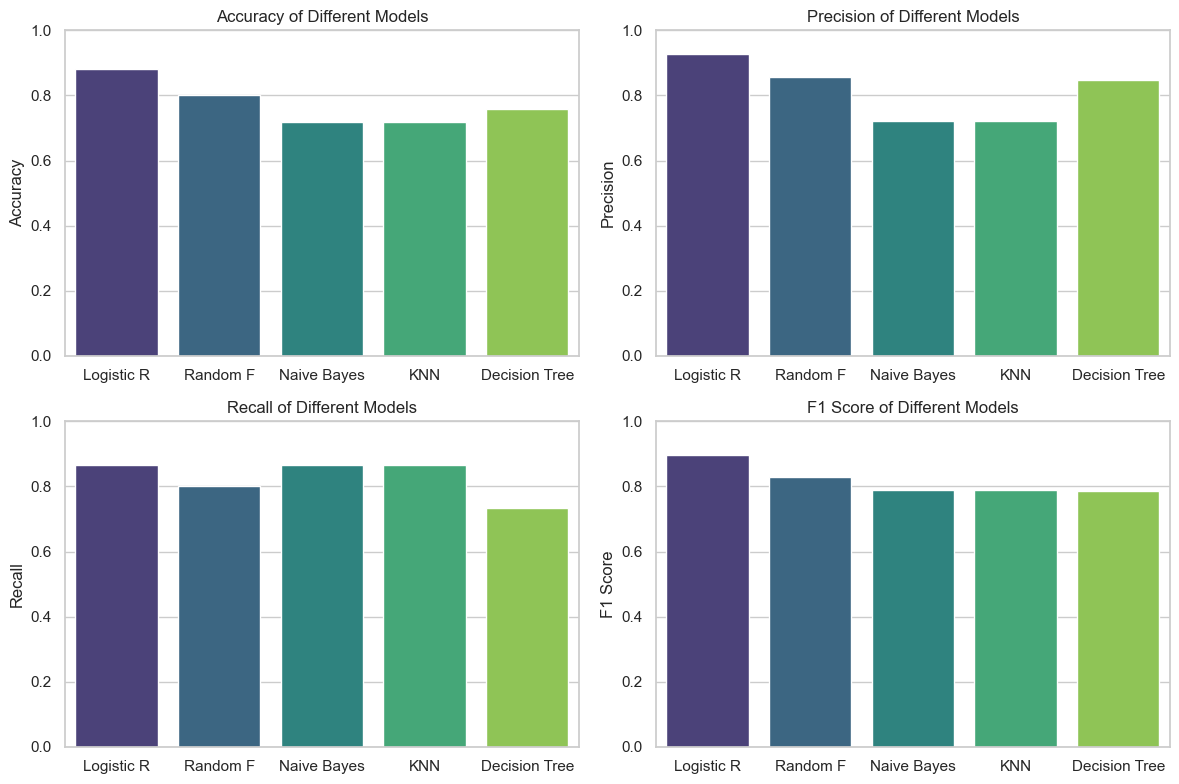

In [330]:
# Dictionary to store trained models
trained_models = {
    "Logistic R": LogisticRegression(**clf_Log.best_params_),
    "Random F": RandomForestClassifier(**clf_rf.best_params_),
    "Naive Bayes": GaussianNB(**clf_nb.best_params_),
    "KNN": KNeighborsClassifier(**clf_knn.best_params_),
    "Decision Tree": DecisionTreeClassifier(**clf_dt.best_params_)
}

# Training models
for model_name, model in trained_models.items():
    model.fit(X_train, y_train)

# Calculating metrics for each model
model_names = list(trained_models.keys())
accuracies = [accuracy_score(y_dev, trained_models[model_name].predict(X_dev)) for model_name in model_names]
precisions = [precision_score(y_dev, trained_models[model_name].predict(X_dev)) for model_name in model_names]
recalls = [recall_score(y_dev, trained_models[model_name].predict(X_dev)) for model_name in model_names]
f1_scores = [f1_score(y_dev, trained_models[model_name].predict(X_dev)) for model_name in model_names]

# Plotting metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracies, precisions, recalls, f1_scores]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=model_names, y=values[i], palette='viridis', ci=None)  # Setting ci=None to remove error bars
    plt.title(f'{metric} of Different Models')
    plt.ylabel(metric)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()
